# K-Means

K-means is an unsupervised machine learning algorithm which is able to find the $k$ centroids which best represent the training data. The trained model can regroup similar examples into these classes based on the determined centroids.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Generate some artificial dataset using some 2D-Gaussians.

In [3]:
params = [[[ 0,1],  [ 0,1]], 
          [[ 5,1],  [ 5,1]], 
          [[-2,5],  [ 2,5]],
          [[ 2,1],  [ 2,1]],
          [[-5,1],  [-5,1]]]

n = 300
dims = len(params[0])

data = []
y = []
for ix, i in enumerate(params):
    inst = np.random.randn(n, dims)
    for dim in range(dims):
        inst[:,dim] = params[ix][dim][0]+params[ix][dim][1]*inst[:,dim]
        label = ix + np.zeros(n)
        
    if len(data) == 0: data = inst
    else: data = np.append( data, inst, axis= 0)
    if len(y) == 0: y = label
    else: y = np.append(y, label)
        
num_clusters = len(params)

print(y.shape)
print(data.shape)

(1500,)
(1500, 2)


Plot a scatter plot of the synthetic data.

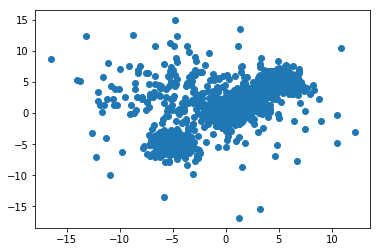

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.show()

## The K-means algorithm.

Repeat until convergence <br>
1. Assign a label $c^i$ for each data instance corresponding with its closest centroid.
2. Calculate the new centroid locations as the center of all the datapoints in each label.

In [11]:
class Kmeans(object):
    
    def __init__(self, k=1):
        self.k = k
        
    def train(self, data, verbose=1):
        
        shape = data.shape
        
        ranges = np.zeros((shape[1], 2))
        centroids = np.zeros((shape[1], 2))
        
        for dim in range(shape[1]):
            ranges[dim, 0] = np.min(data[:,dim])
            ranges[dim, 1] = np.max(data[:,dim])
        
        if verbose == 1:
            print('Ranges: ')
            print(ranges)
        
        centroids = np.zeros((self.k, shape[1]))
        for i in range(self.k):
            for dim in range(shape[1]):
                centroids[i, dim] = np.random.uniform(ranges[dim, 0], ranges[dim, 1], 1)
        
        if verbose == 1:
            print('Centroids: ')
            print(centroids)
        
            plt.scatter(data[:,0], data[:,1])
            plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
            plt.show()
        
        count = 0
        while count < 100:
            count += 1
            if verbose == 1:
                print('-----------------------------------------------')
                print('Iteration: ', count)
            
            distances = np.zeros((shape[0],self.k))
            for ix, i in enumerate(data):
                for ic, c in enumerate(centroids):
                    distances[ix, ic] = np.sqrt(np.sum((i-c)**2))
                    
            labels = np.argmin(distances, axis = 1)
            
            new_centroids = np.zeros((self.k, shape[1]))
            for centroid in range(self.k):
                temp = data[labels == centroid]
                if len(temp) == 0:
                    return 0
                for dim in range(shape[1]): 
                    new_centroids[centroid, dim] = np.mean(temp[:,dim])
            
            if verbose == 1:
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()
            
            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                break
                
            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels
        if verbose == 1:
            print(labels)
            print(centroids)
        return 1
    
    def getAverageDistance(self, data):
        
        dists = np.zeros((len(self.centroids),))
        for ix, centroid in enumerate(self.centroids):
            temp = data[self.labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = dist/len(temp)
        return dists
    
    def getLabels(self):
        return self.labels

Ranges: 
[[-16.50661808  12.17610945]
 [-16.83214902  14.9062123 ]]
Centroids: 
[[11.36347943 14.17246335]
 [ 6.49360857 -1.39422816]
 [-8.48599102  8.771375  ]
 [-5.93655678  1.52878623]]


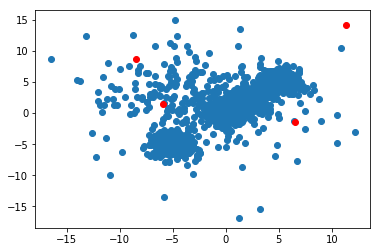

-----------------------------------------------
Iteration:  1


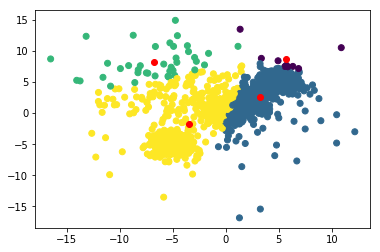

-----------------------------------------------
Iteration:  2


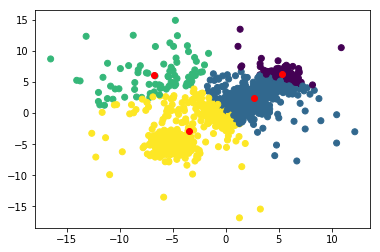

-----------------------------------------------
Iteration:  3


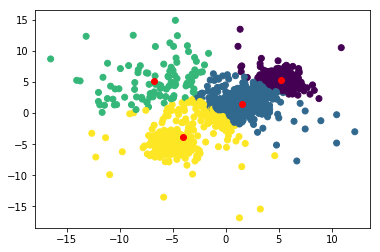

-----------------------------------------------
Iteration:  4


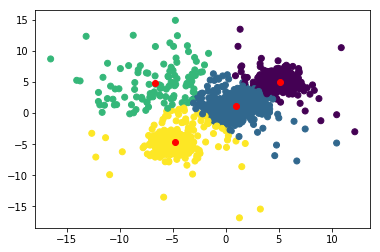

-----------------------------------------------
Iteration:  5


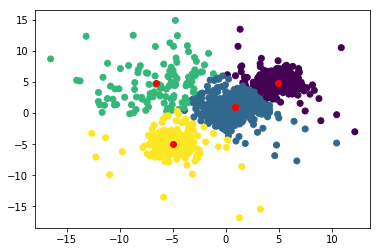

-----------------------------------------------
Iteration:  6


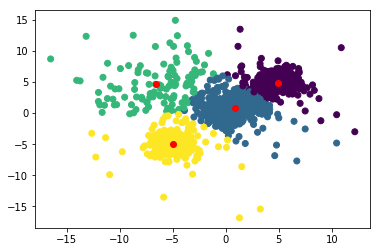

-----------------------------------------------
Iteration:  7


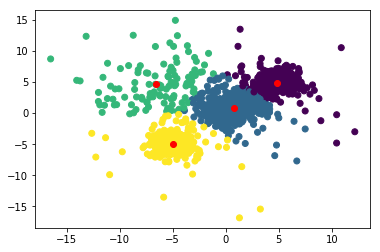

-----------------------------------------------
Iteration:  8


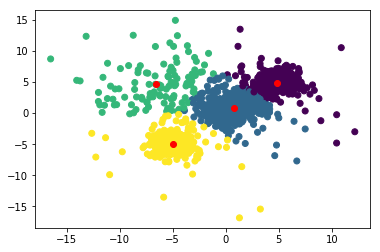

-----------------------------------------------
Iteration:  9


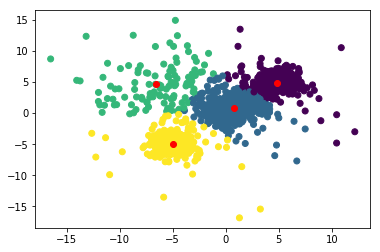

-----------------------------------------------
Iteration:  10


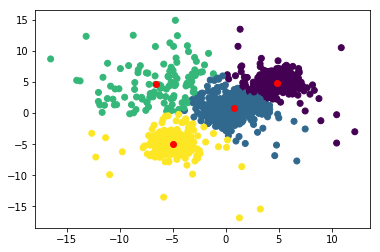

-----------------------------------------------
Iteration:  11


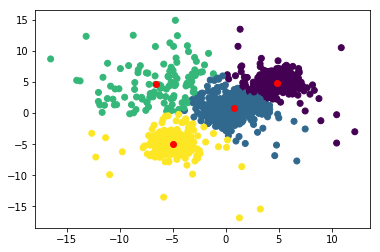

DONE!
[1 1 1 ... 3 3 3]
[[ 4.84554682  4.79948707]
 [ 0.81896573  0.84284718]
 [-6.54330336  4.72123862]
 [-4.95194773 -4.94594431]]


1

In [12]:
kmeans = Kmeans(4)
kmeans.train(data)

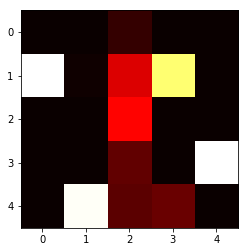

In [7]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(kmeans.getLabels(), y)

plt.imshow(conf, cmap = 'hot')
plt.show()

In [8]:
confusion_matrix(kmeans.getLabels(), y)[0,0]

0

## Selecting $k$

The number of clusters $k$ is a hyper-parameter and must be chosen by the user. This value can be determined using the average distance of the centroid its associated data points. Too little clusters will cause the average distance to be very large. Once the average distance starts to converge, we have reached the optimal number of clusters.

K-means with k:  1
DONE!
K-means with k:  2
DONE!
K-means with k:  3
DONE!
K-means with k:  4
DONE!
K-means with k:  5
DONE!
K-means with k:  6
DONE!
K-means with k:  7
DONE!
K-means with k:  8
DONE!
K-means with k:  9
DONE!
K-means with k:  10
DONE!


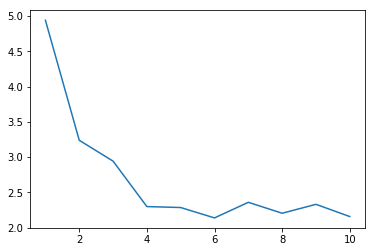

Real number of clusters: 5


In [9]:
k = [1,2,3,4,5,6,7,8,9,10]
avg_dists = np.zeros((len(k),))

temp = 0
for ix, i in enumerate(k):
    print('K-means with k: ', i)
    kmeans = Kmeans(i)
    while temp == 0:
        temp = kmeans.train(data, 0)
    temp = 0
    avg_dists[ix] = np.mean(kmeans.getAverageDistance(data))
    
plt.plot(range(1, len(avg_dists)+1), avg_dists)
plt.show()

print('Real number of clusters:', num_clusters)